**Experiment 2: Loan Amount Prediction using Linear Regression**

Name: Anjana Venugopalan Register No: 3122237001004

**Aim:**
The aim of this experiment is to develop a Linear Regression model to predict the loan amount
sanctioned to users based on historical data with various features. The model’s performance will
be evaluated using metrics such as MAE, MSE, RMSE, and R² score. Visualization techniques will
be employed to analyze data distribution, model fit, and residual errors

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64

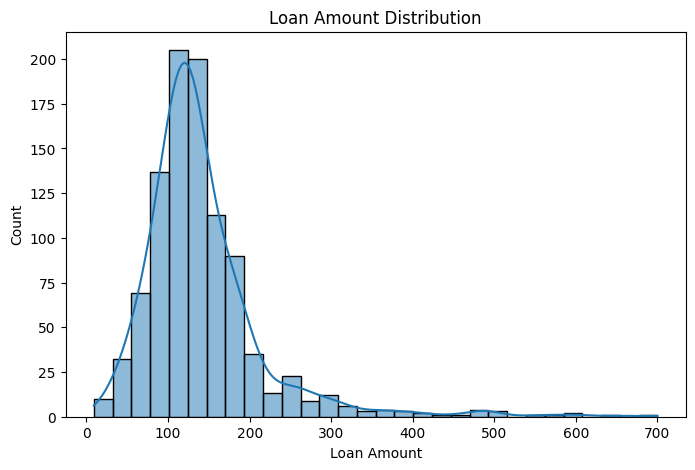

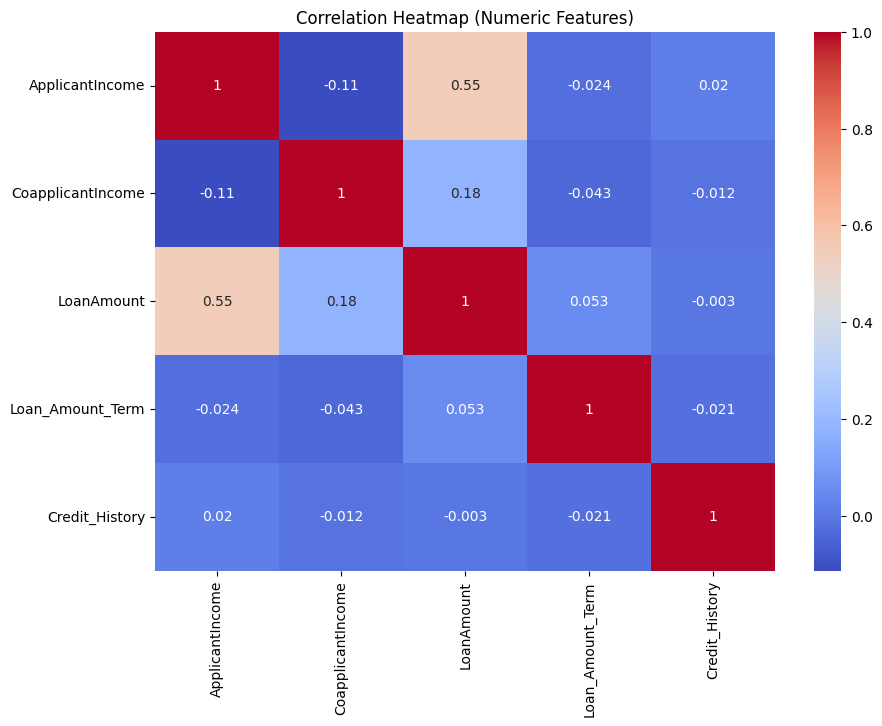

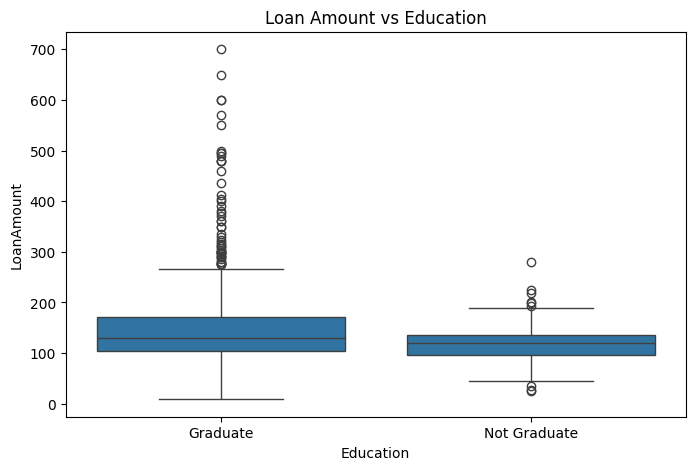


--- Validation Set Performance ---
Validation Set Metrics:
  MAE: 38.11
  MSE: 2723.74
  RMSE: 52.19
  R2 Score: 0.50

--- Test Set Performance ---
Test Set Metrics:
  MAE: 38.71
  MSE: 2872.88
  RMSE: 53.60
  R2 Score: 0.22


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


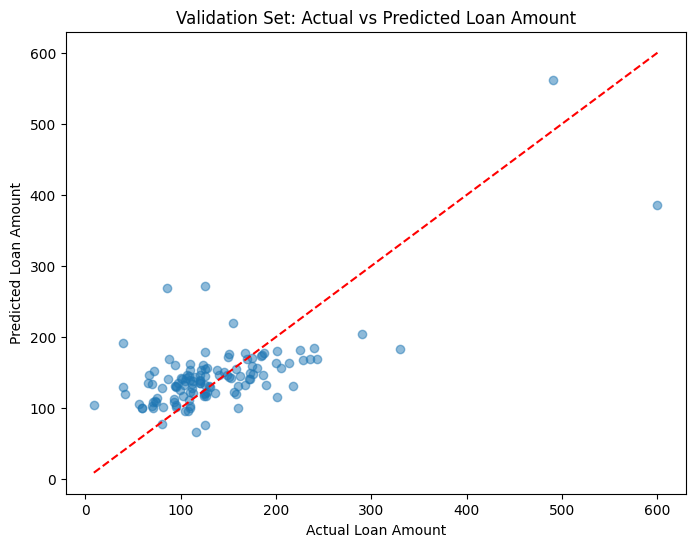

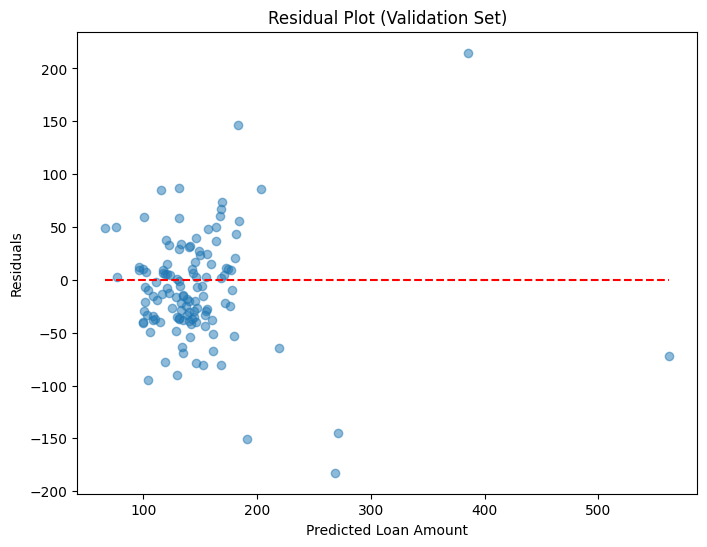

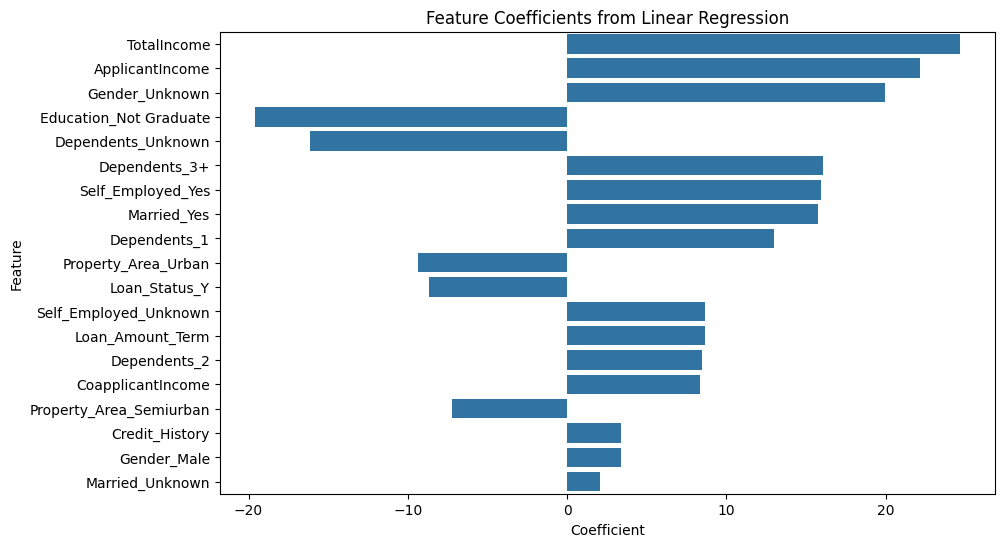

In [ ]:
# Step 0: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load datasets
train_path = '/content/drive/MyDrive/Colab Notebooks/loan_train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/loan_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Combine train and test for preprocessing and EDA (if test set doesn't have target, exclude from model)
data = pd.concat([train_df, test_df], ignore_index=True, sort=False)

# Step 3: Preprocessing
# Handle missing values
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill numeric missing with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill categorical missing with 'Unknown'
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Step 4: Exploratory Data Analysis (EDA)
print("=== Dataset Info ===")
print(data.info())

print("\n=== Summary Statistics ===")
print(data.describe(include='all'))

print("\n=== Missing Values ===")
print(data.isnull().sum())

# Distribution of LoanAmount
plt.figure(figsize=(8,5))
sns.histplot(data['LoanAmount'].dropna(), bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.show()

# Correlation Heatmap for numeric features
plt.figure(figsize=(10,7))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# Boxplot for ApplicantIncome vs LoanAmount
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount vs Education')
plt.show()

# Step 5: Feature Engineering
# Example: Create TotalIncome feature (ApplicantIncome + CoapplicantIncome)
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Drop irrelevant or ID columns if present
drop_cols = ['Loan_ID'] if 'Loan_ID' in data.columns else []
data.drop(columns=drop_cols, inplace=True)

# Step 6: Split data back to train/test
train_data = data.iloc[:len(train_df), :].copy()
test_data = data.iloc[len(train_df):, :].copy()

X_train = train_data.drop('LoanAmount', axis=1)
y_train = train_data['LoanAmount']

X_test = test_data.drop('LoanAmount', axis=1, errors='ignore')  # test might not have LoanAmount
y_test = test_data['LoanAmount'] if 'LoanAmount' in test_data.columns else None

# Further split train data into train + validation (80% train, 20% val)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 7: Preprocessing pipeline for model
numerical_features = X_train_final.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_final.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 8: Train model
model.fit(X_train_final, y_train_final)

# Step 9: Evaluate model on validation and test (if test has target)
def evaluate_model(X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    return y_pred

print("\n--- Validation Set Performance ---")
y_val_pred = evaluate_model(X_val, y_val, "Validation Set")

if y_test is not None:
    print("\n--- Test Set Performance ---")
    y_test_pred = evaluate_model(X_test, y_test, "Test Set")

# Step 10: Visualize results
# Predicted vs Actual on Validation Set
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Validation Set: Actual vs Predicted Loan Amount")
plt.show()

# Residual plot on validation set
residuals = y_val - y_val_pred
plt.figure(figsize=(8,6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_val_pred.min(), xmax=y_val_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Loan Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot (Validation Set)")
plt.show()

# Step 11: Feature coefficients
# Extract feature names after preprocessing
ohe_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, ohe_features])

coefficients = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Feature Coefficients from Linear Regression")
plt.show()


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [ ]:
# Step 2: Load dataset
train_path = '/content/drive/MyDrive/Colab Notebooks/loan_train.csv'
data = pd.read_csv(train_path)
print(data)

# Step 3: Preprocessing
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('LoanAmount')
categorical_cols = data.select_dtypes(include=['object']).columns
print(numeric_cols)
categorical_cols


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:

# Fill missing values
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
data[categorical_cols] = data[categorical_cols].fillna('Unknown')
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

print("\n--------------------", data)

# Feature Engineering: Create TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Drop irrelevant columns if any
if 'Loan_ID' in data.columns:
    data.drop('Loan_ID', axis=1, inplace=True)
data


--------------------       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
# Define features and target
X = data.drop('LoanAmount', axis=1)
y = data['LoanAmount']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



In [ ]:
# Step 4: K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_fold_train, y_fold_train)
    y_val_pred = model.predict(X_fold_val)

    mae = mean_absolute_error(y_fold_val, y_val_pred)
    mse = mean_squared_error(y_fold_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_fold_val, y_val_pred)

    cv_results.append({'Fold': fold, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

# Average CV scores
avg_results = {
    'Fold': 'Average',
    'MAE': np.mean([r['MAE'] for r in cv_results]),
    'MSE': np.mean([r['MSE'] for r in cv_results]),
    'RMSE': np.mean([r['RMSE'] for r in cv_results]),
    'R2 Score': np.mean([r['R2 Score'] for r in cv_results]),
}

cv_results.append(avg_results)



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Step 5: Train on full training set and evaluate on test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Adjusted R2 Score calculation
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

# Feature Coefficients extraction
ohe_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, ohe_features])
coefficients = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Display CV results table
cv_df = pd.DataFrame(cv_results)
print("Table 1: Cross-Validation Results (K=5)")
print(cv_df.to_string(index=False))

# Display summary results table to fill
print("\nTable 2: Summary of Results for Loan Amount Prediction")
print(f"Dataset Size (after preprocessing): {data.shape[0]} rows, {data.shape[1]} features")
print(f"Train/Test Split Ratio: 80/20")
print(f"Feature(s) Used for Prediction: {list(X.columns)}")
print(f"Model Used: Linear Regression")
print(f"Cross-Validation Used?: Yes")
print(f"Number of Folds (K): 5")
print(f"Reference to CV Results Table: Table 1")
print(f"Mean Absolute Error (MAE) on Test Set: {test_mae:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {test_rmse:.2f}")
print(f"R2 Score on Test Set: {test_r2:.4f}")
print(f"Adjusted R2 Score on Test Set: {adjusted_r2:.4f}")
print(f"Most Influential Feature(s):\n{coef_df.head(5).to_string(index=False)}")



Table 1: Cross-Validation Results (K=5)
   Fold       MAE         MSE      RMSE  R2 Score
      1 45.875689 5177.799096 71.956925  0.320963
      2 49.159694 6794.279354 82.427419  0.466318
      3 48.505173 7109.812622 84.319705  0.171691
      4 32.025037 2907.278414 53.919184  0.108924
      5 43.400098 4530.277597 67.307337  0.042808
Average 43.793138 5303.889417 71.986114  0.222141

Table 2: Summary of Results for Loan Amount Prediction
Dataset Size (after preprocessing): 614 rows, 13 features
Train/Test Split Ratio: 80/20
Feature(s) Used for Prediction: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'TotalIncome']
Model Used: Linear Regression
Cross-Validation Used?: Yes
Number of Folds (K): 5
Reference to CV Results Table: Table 1
Mean Absolute Error (MAE) on Test Set: 38.01
Mean Squared Error (MSE) on Test Set: 2713.53
Root Mean Squared Error (RMSE) o

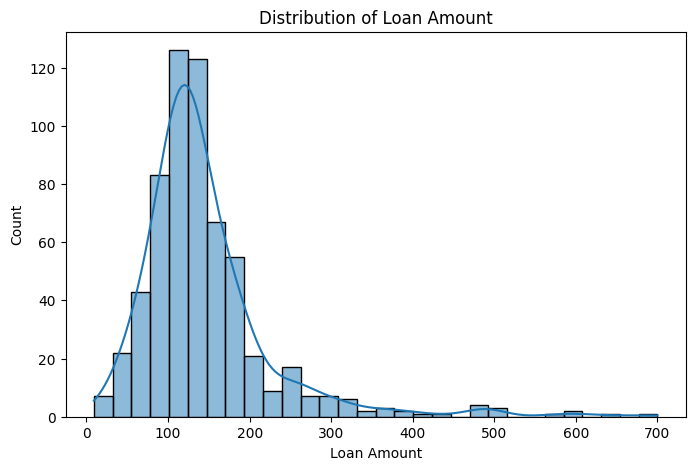

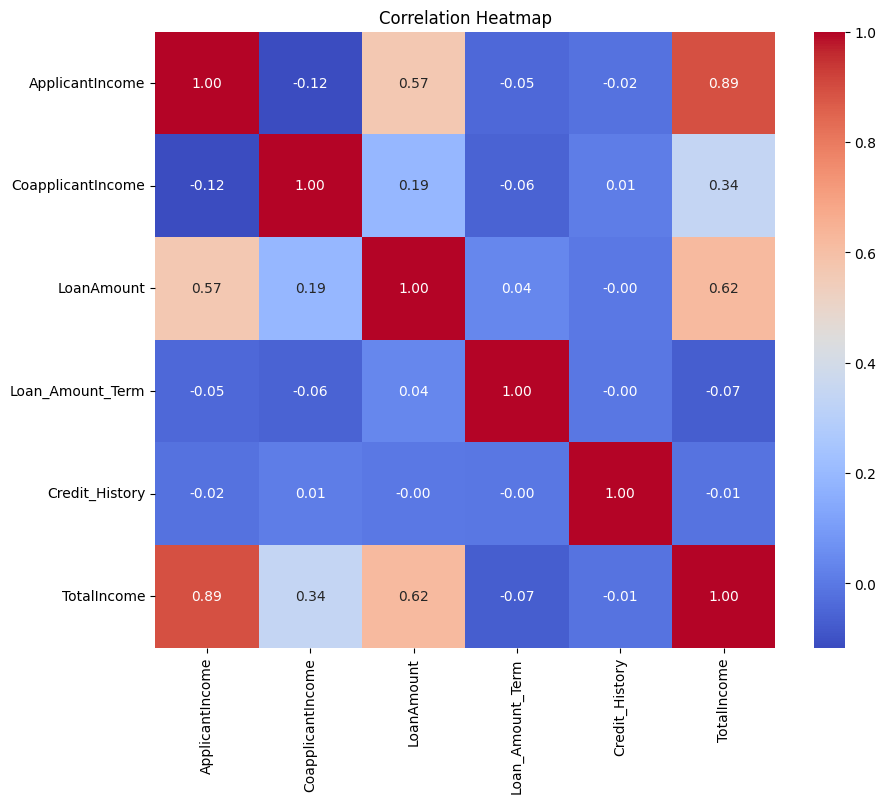

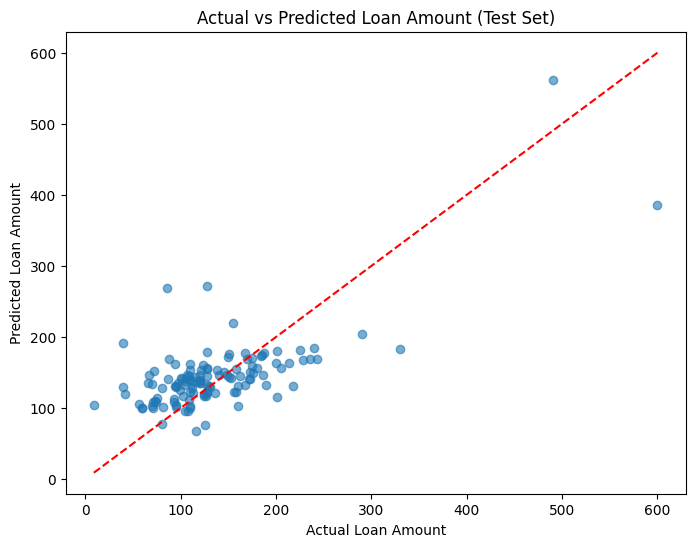

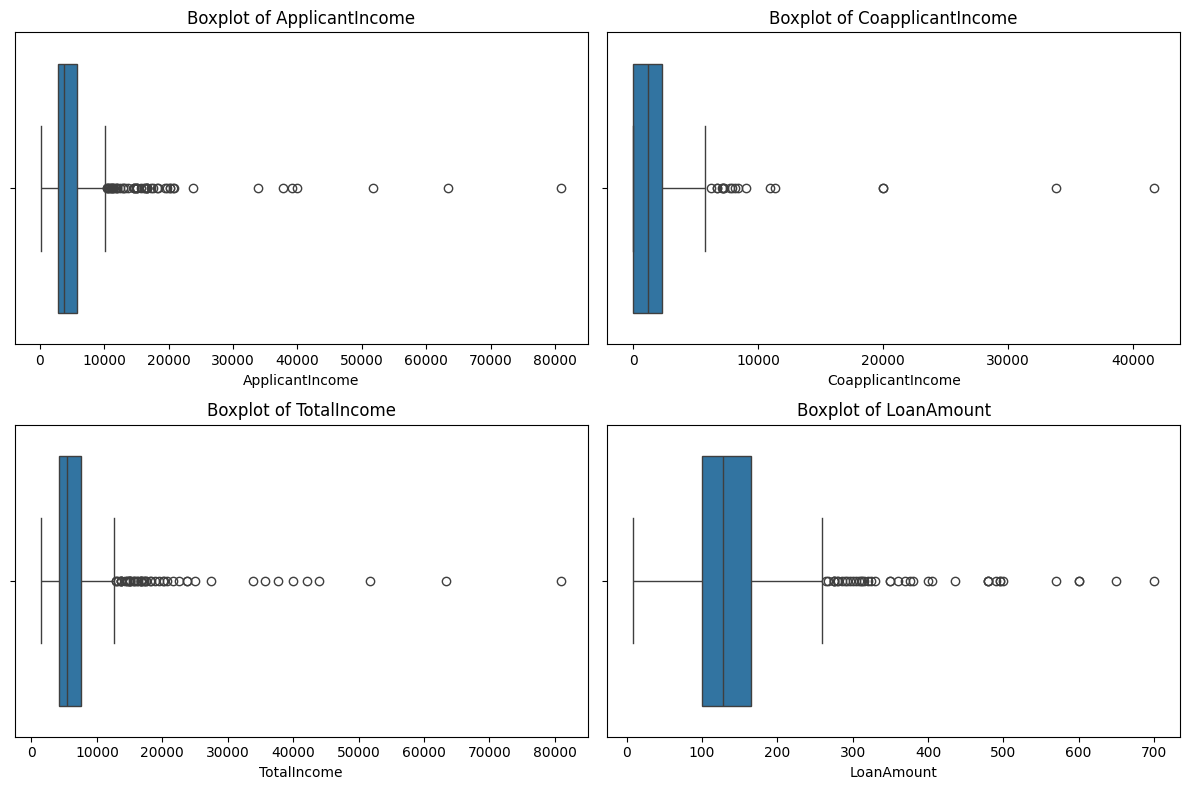

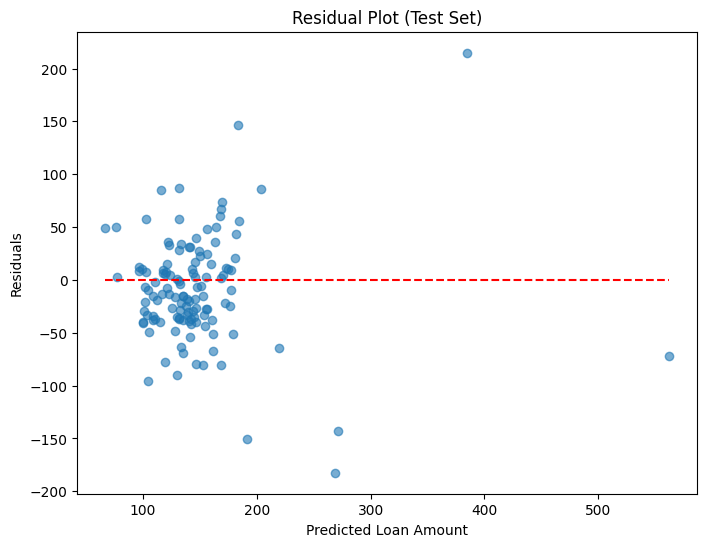

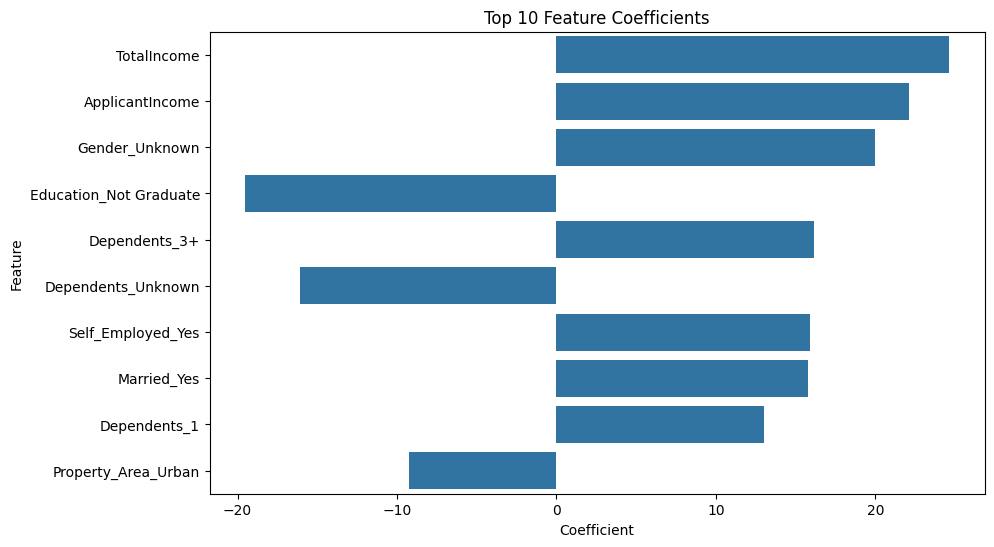

In [ ]:
# Step 6: Plots

# 1. Distribution Plot of LoanAmount
plt.figure(figsize=(8,5))
sns.histplot(data['LoanAmount'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10,8))
# Select only numerical columns for correlation heatmap
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Actual vs Predicted on Test Set
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount (Test Set)")
plt.show()

# 4. Boxplots for numerical features to identify outliers
numerical_features_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'LoanAmount']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# 5. Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='dashed')
plt.xlabel("Predicted Loan Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

# 6. Bar plot of top coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Feature Coefficients")
plt.show()